In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
from pathlib import Path
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
data_path = Path('../data/raw/fraud_kaggle_creditcard_source-kaggle_dataset-creditcardfraud_20250820-192958.csv')
df = pd.read_csv(data_path)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1) First look

In [3]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(None,
 Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64)

## 2) Numeric profile

In [6]:
desc = df[['Time','Amount','V1','V2','V3']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000,-0.035567,-1.293528
Amount,284807.0,8.834962e+01,250.120109,0.000000,5.600000,22.000000,77.165000,25691.160000,16.977635,845.077788
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930,-3.280650,32.486088
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729,-4.624841,95.771404
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558,-2.240144,26.619062


## 3) Distributions (TODO: add at least 3)

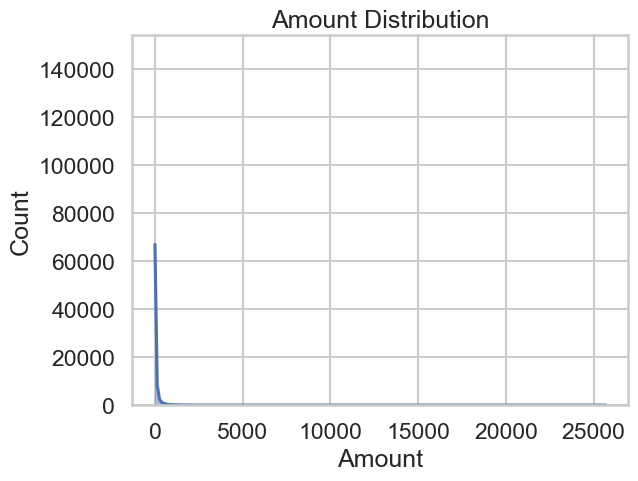

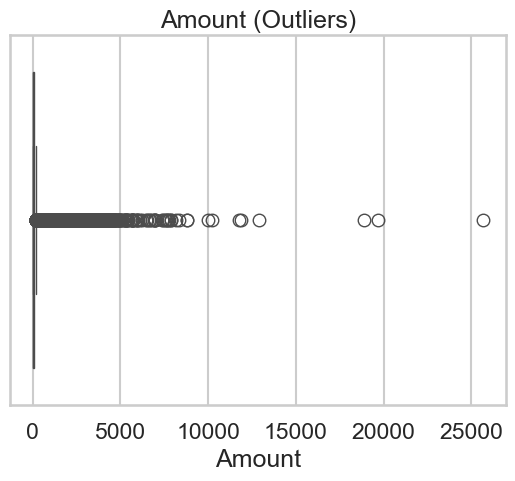

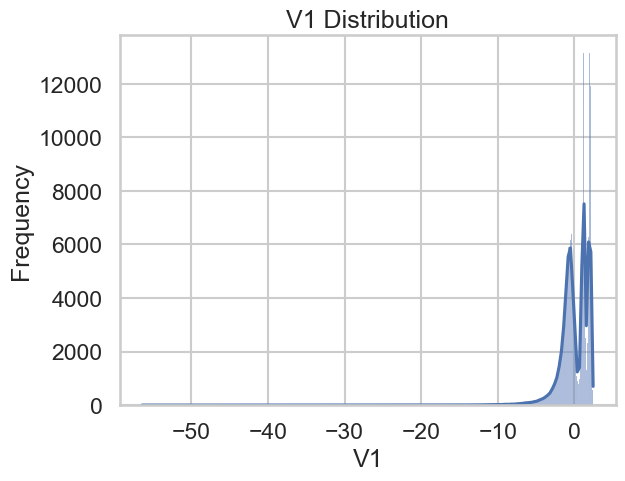

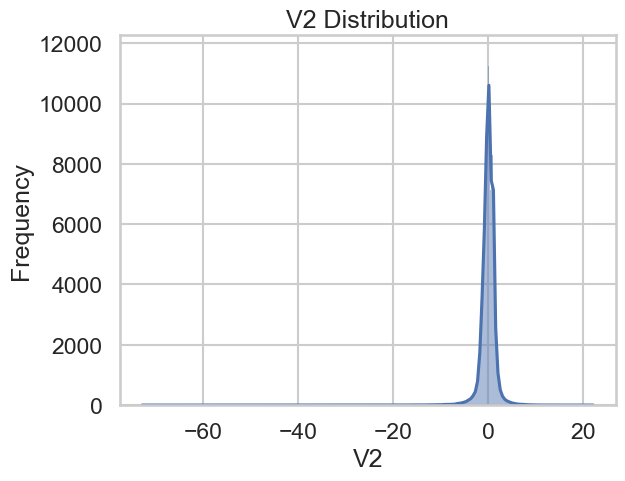

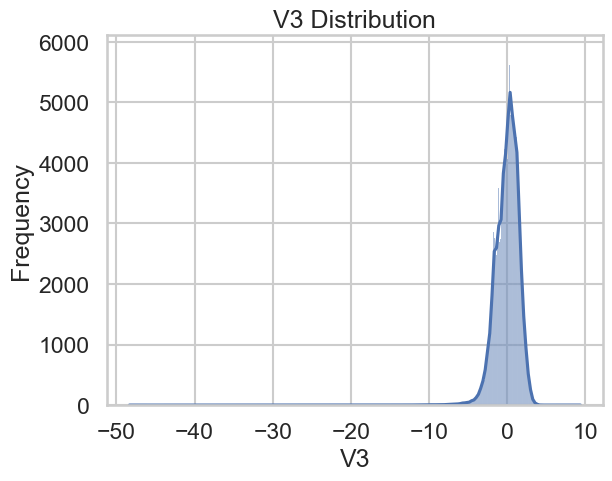

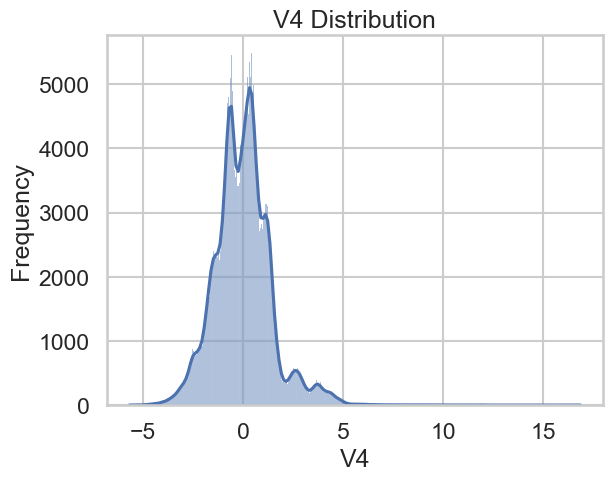

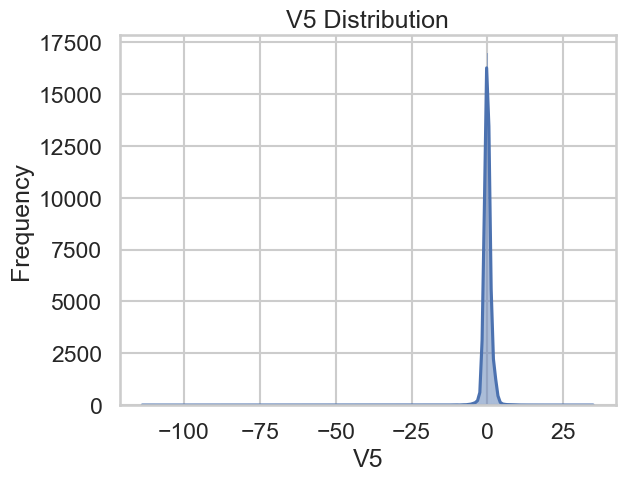

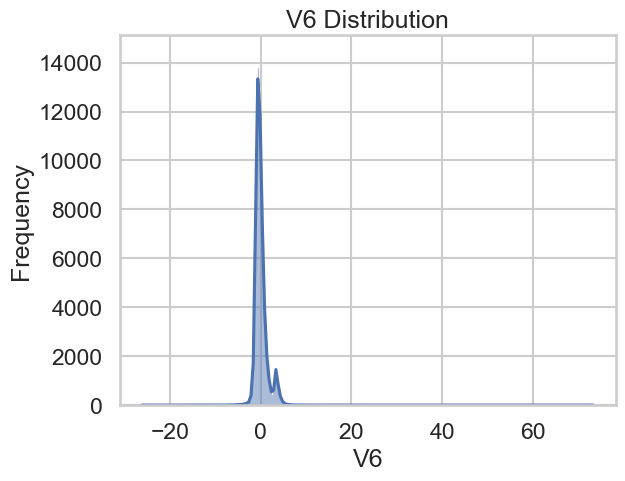

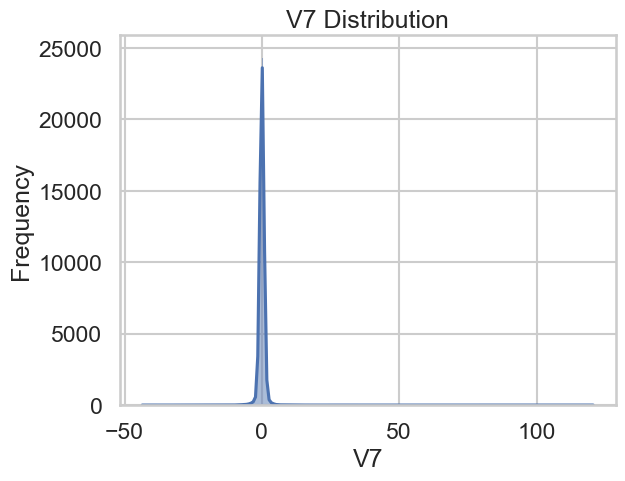

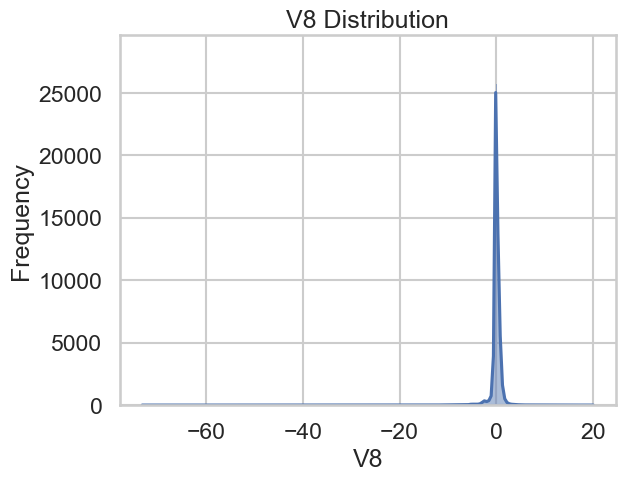

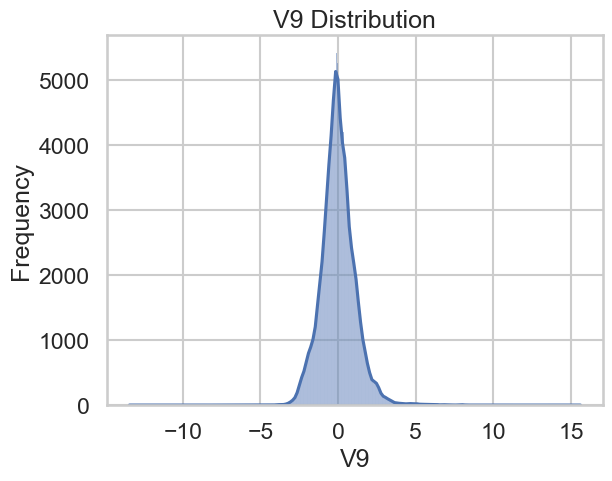

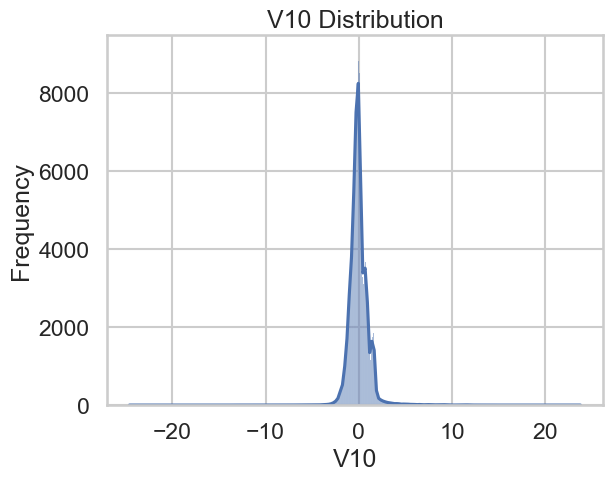

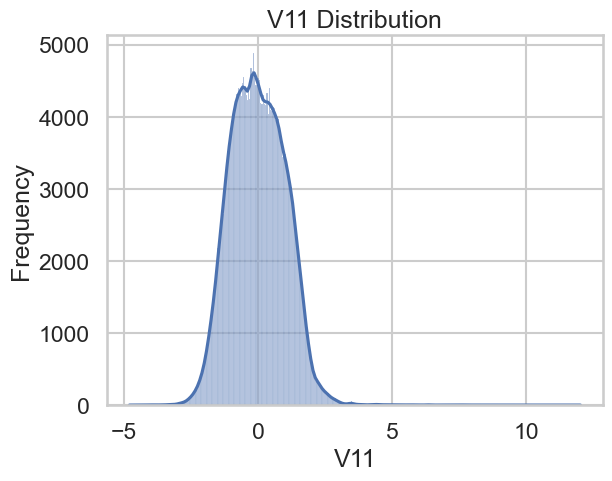

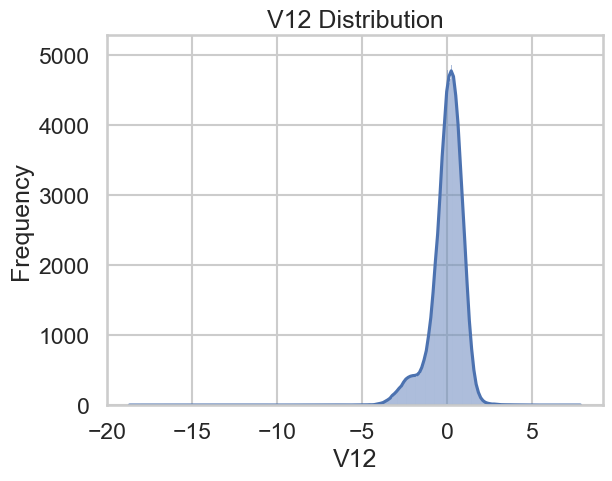

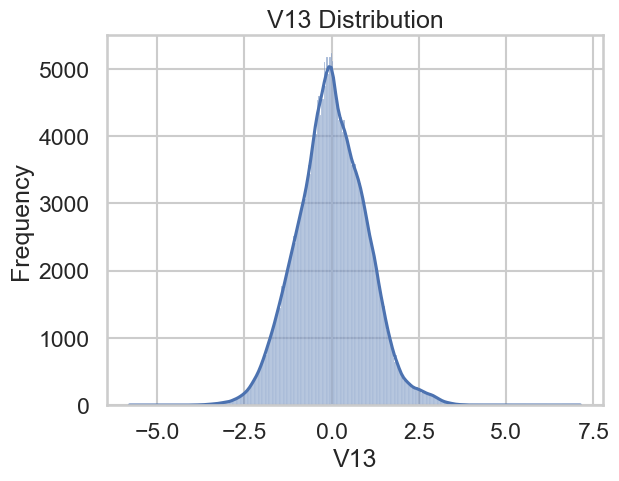

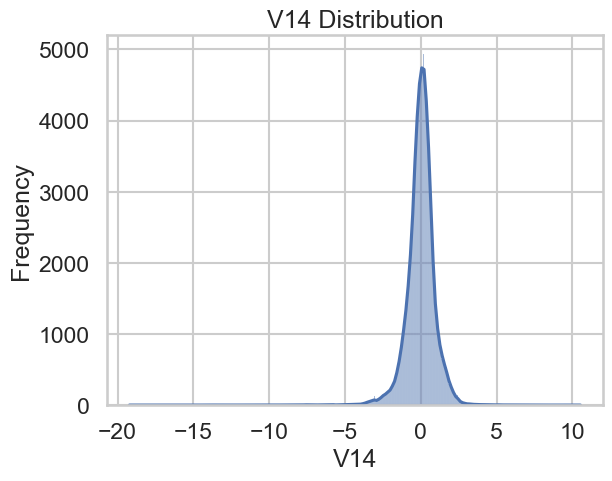

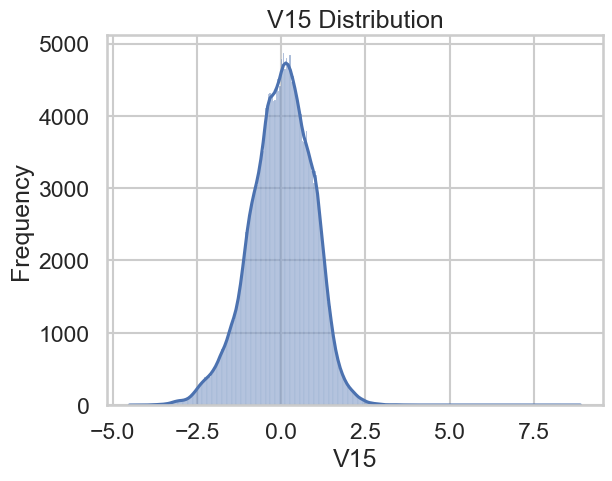

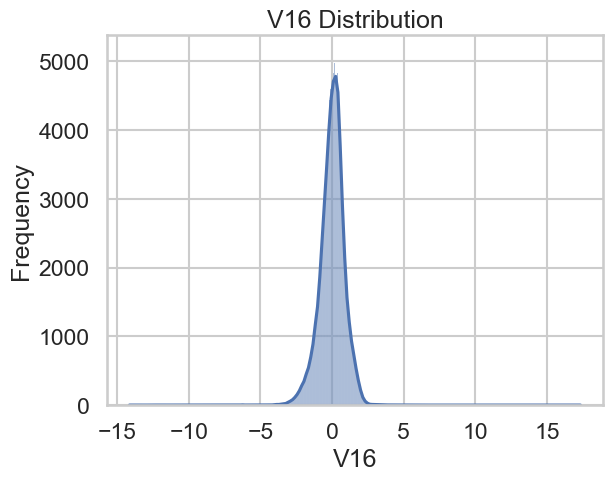

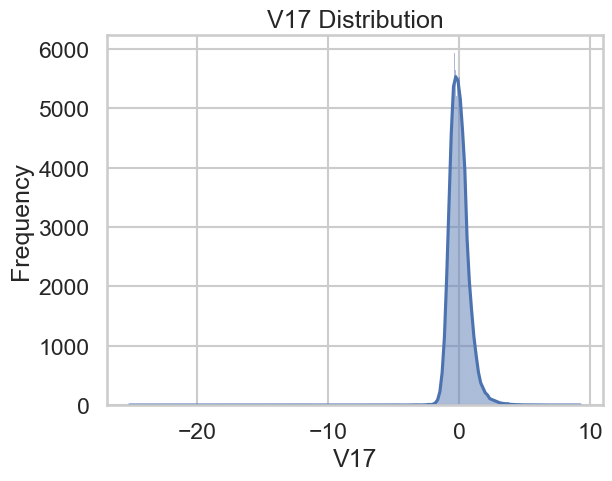

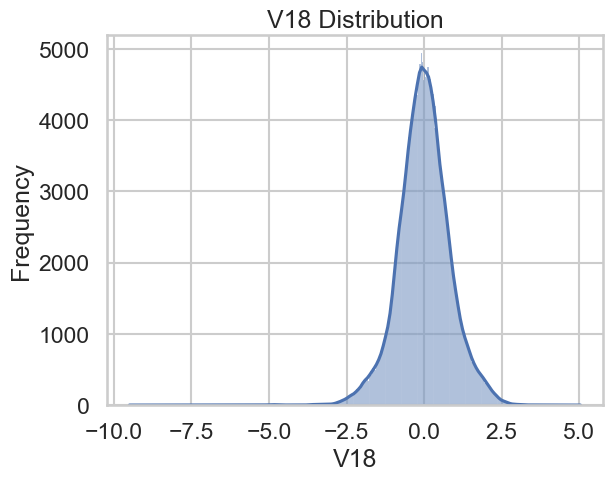

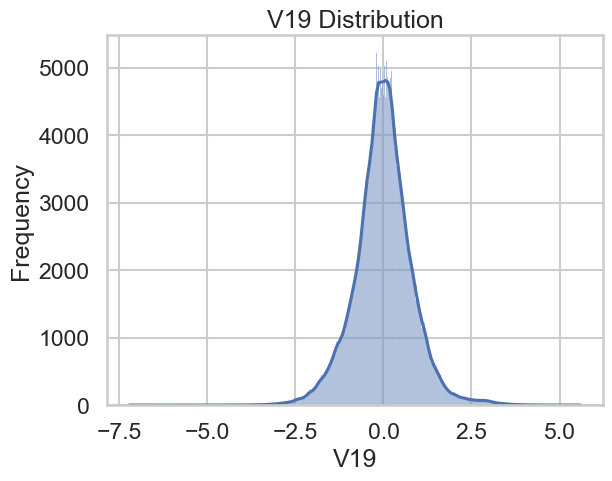

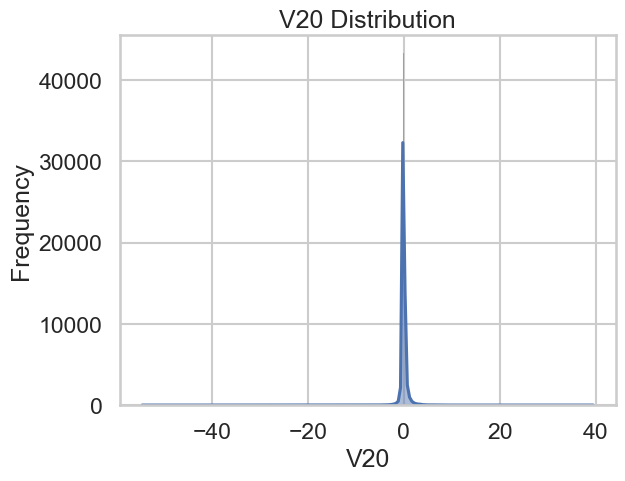

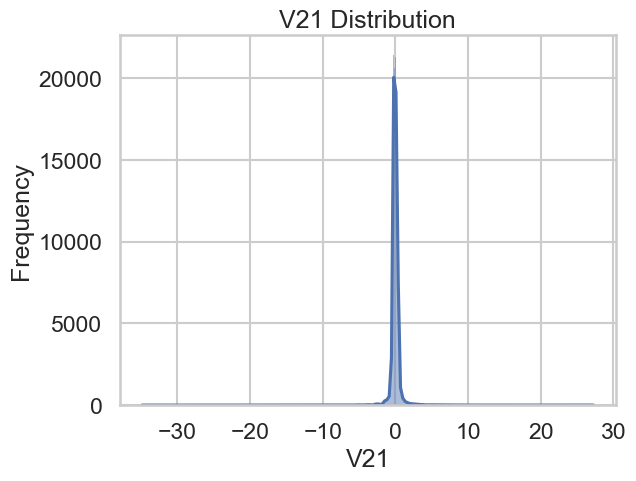

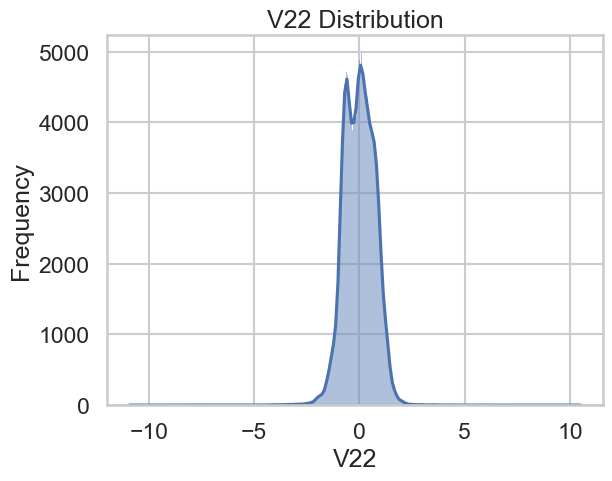

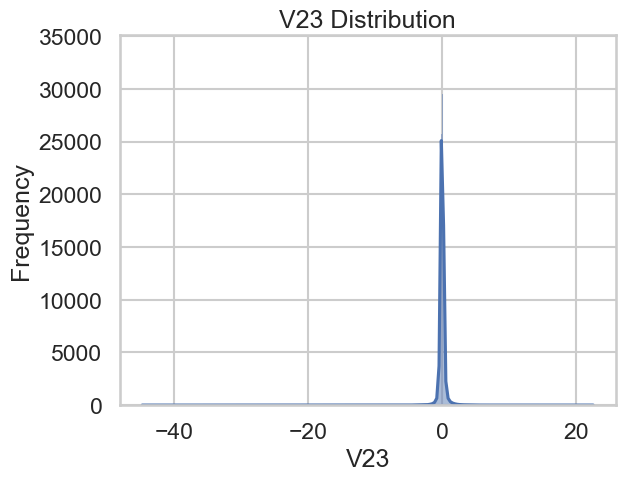

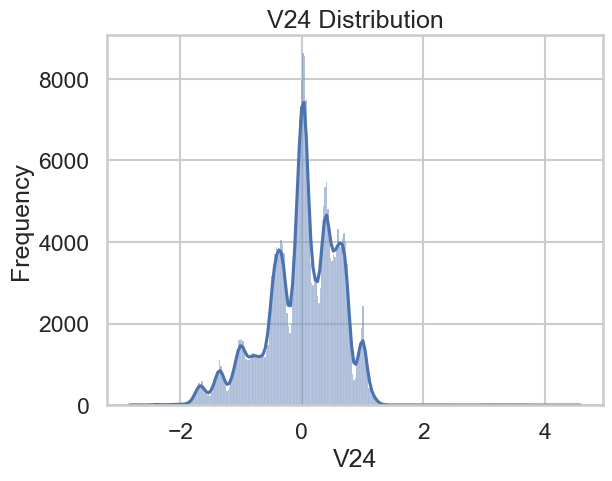

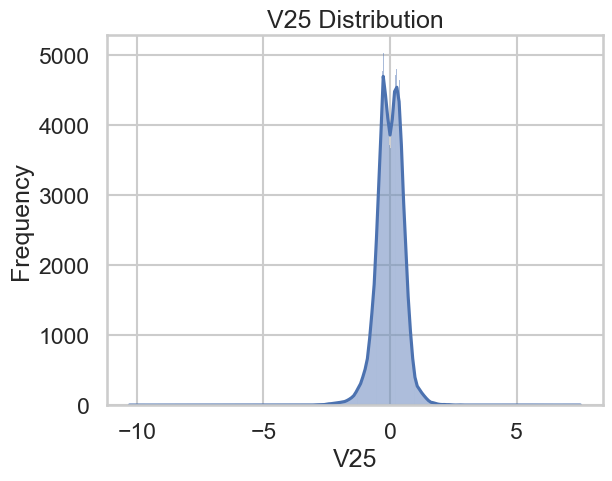

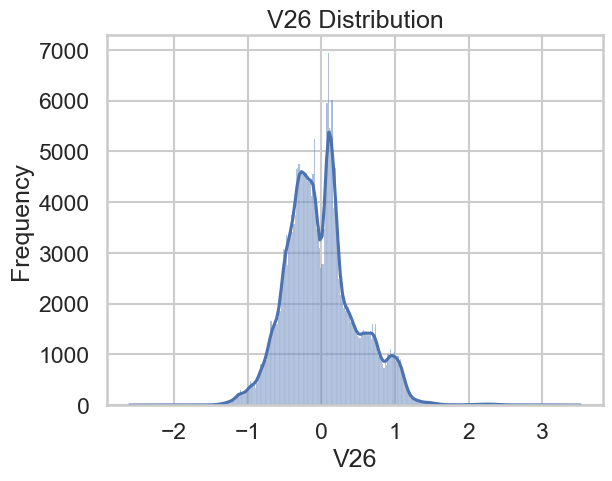

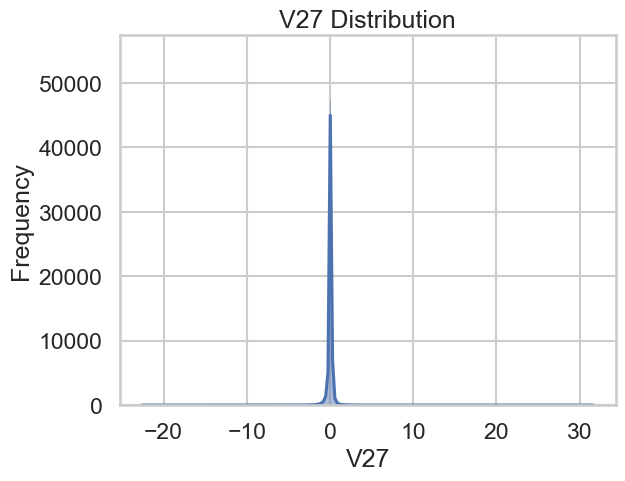

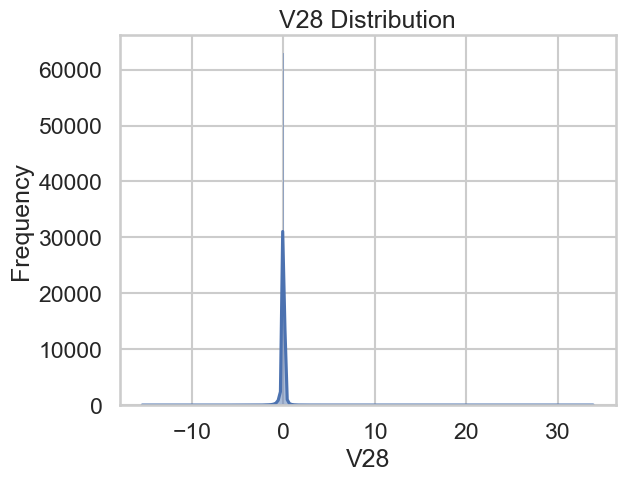

In [12]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['Amount'], kde=True)
plt.title('Amount Distribution')
plt.show()

# TODO: boxplot for amount
sns.boxplot(x=df['Amount'])
plt.title('Amount (Outliers)')
plt.show()

# TODO: histogram for V1  - V28
for col in [f'V{i}' for i in range(1, 29)]:
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()




## 4) Relationships (TODO: add at least 2)

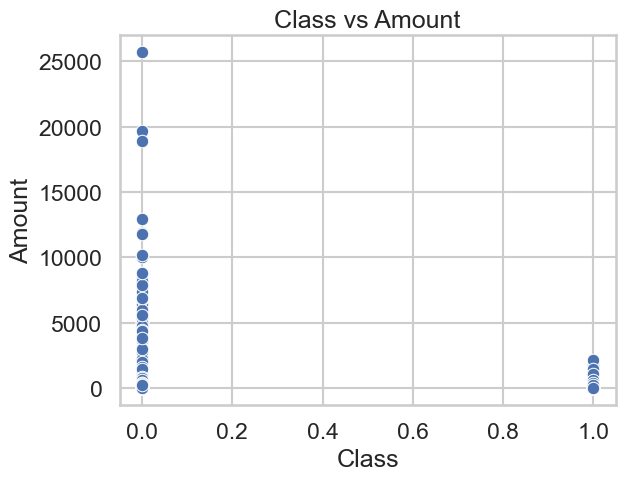

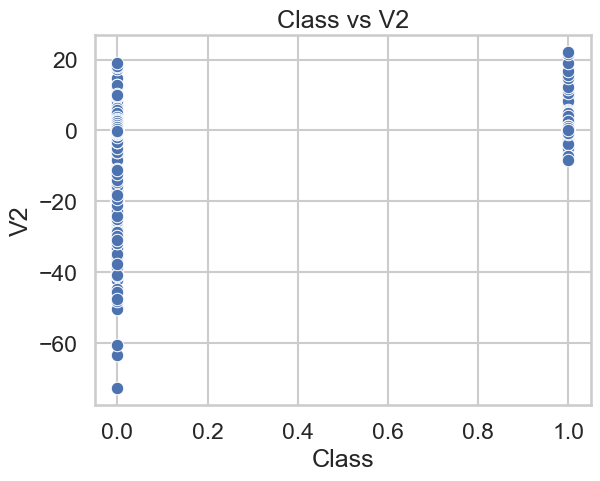

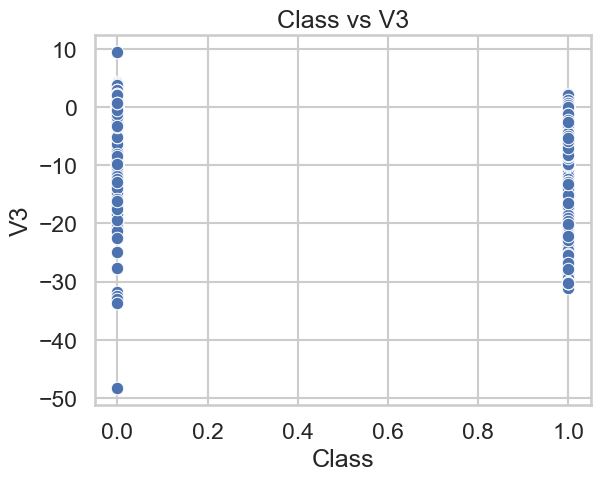

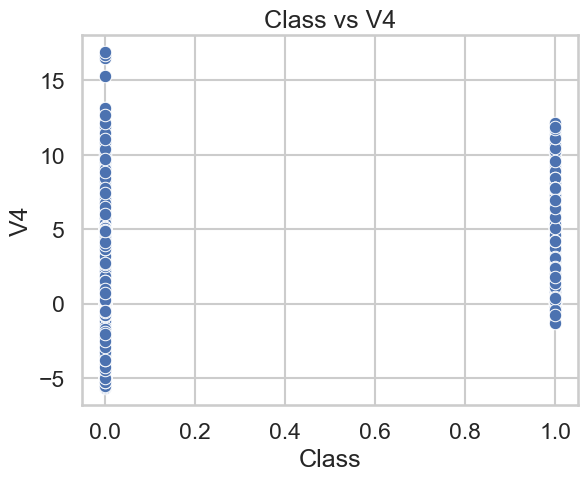

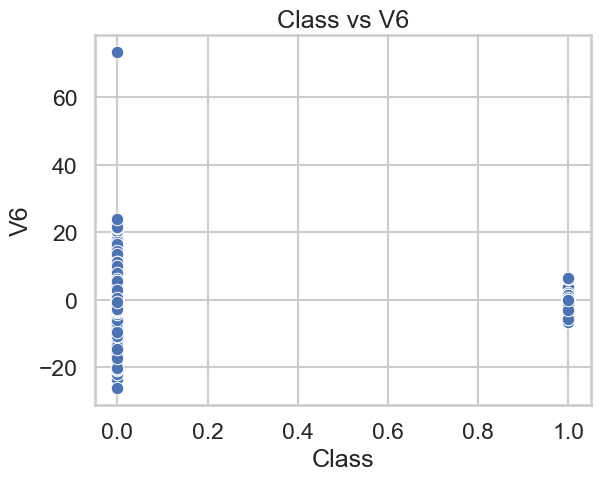

In [13]:
sns.scatterplot(data=df, x='Class', y='Amount')
plt.title('Class vs Amount')
plt.show()

sns.scatterplot(data=df, x='Class', y='V2')
plt.title('Class vs V2')
plt.show()

sns.scatterplot(data=df, x='Class', y='V3')
plt.title('Class vs V3')
plt.show()

sns.scatterplot(data=df, x='Class', y='V4')
plt.title('Class vs V4')
plt.show()

sns.scatterplot(data=df, x='Class', y='V6')
plt.title('Class vs V6')
plt.show()
#hard to figure what the variables are, but it seems like V5 and V6 are correlated with each other, might be related in their calculation

## 5) (Optional) Correlation matrix

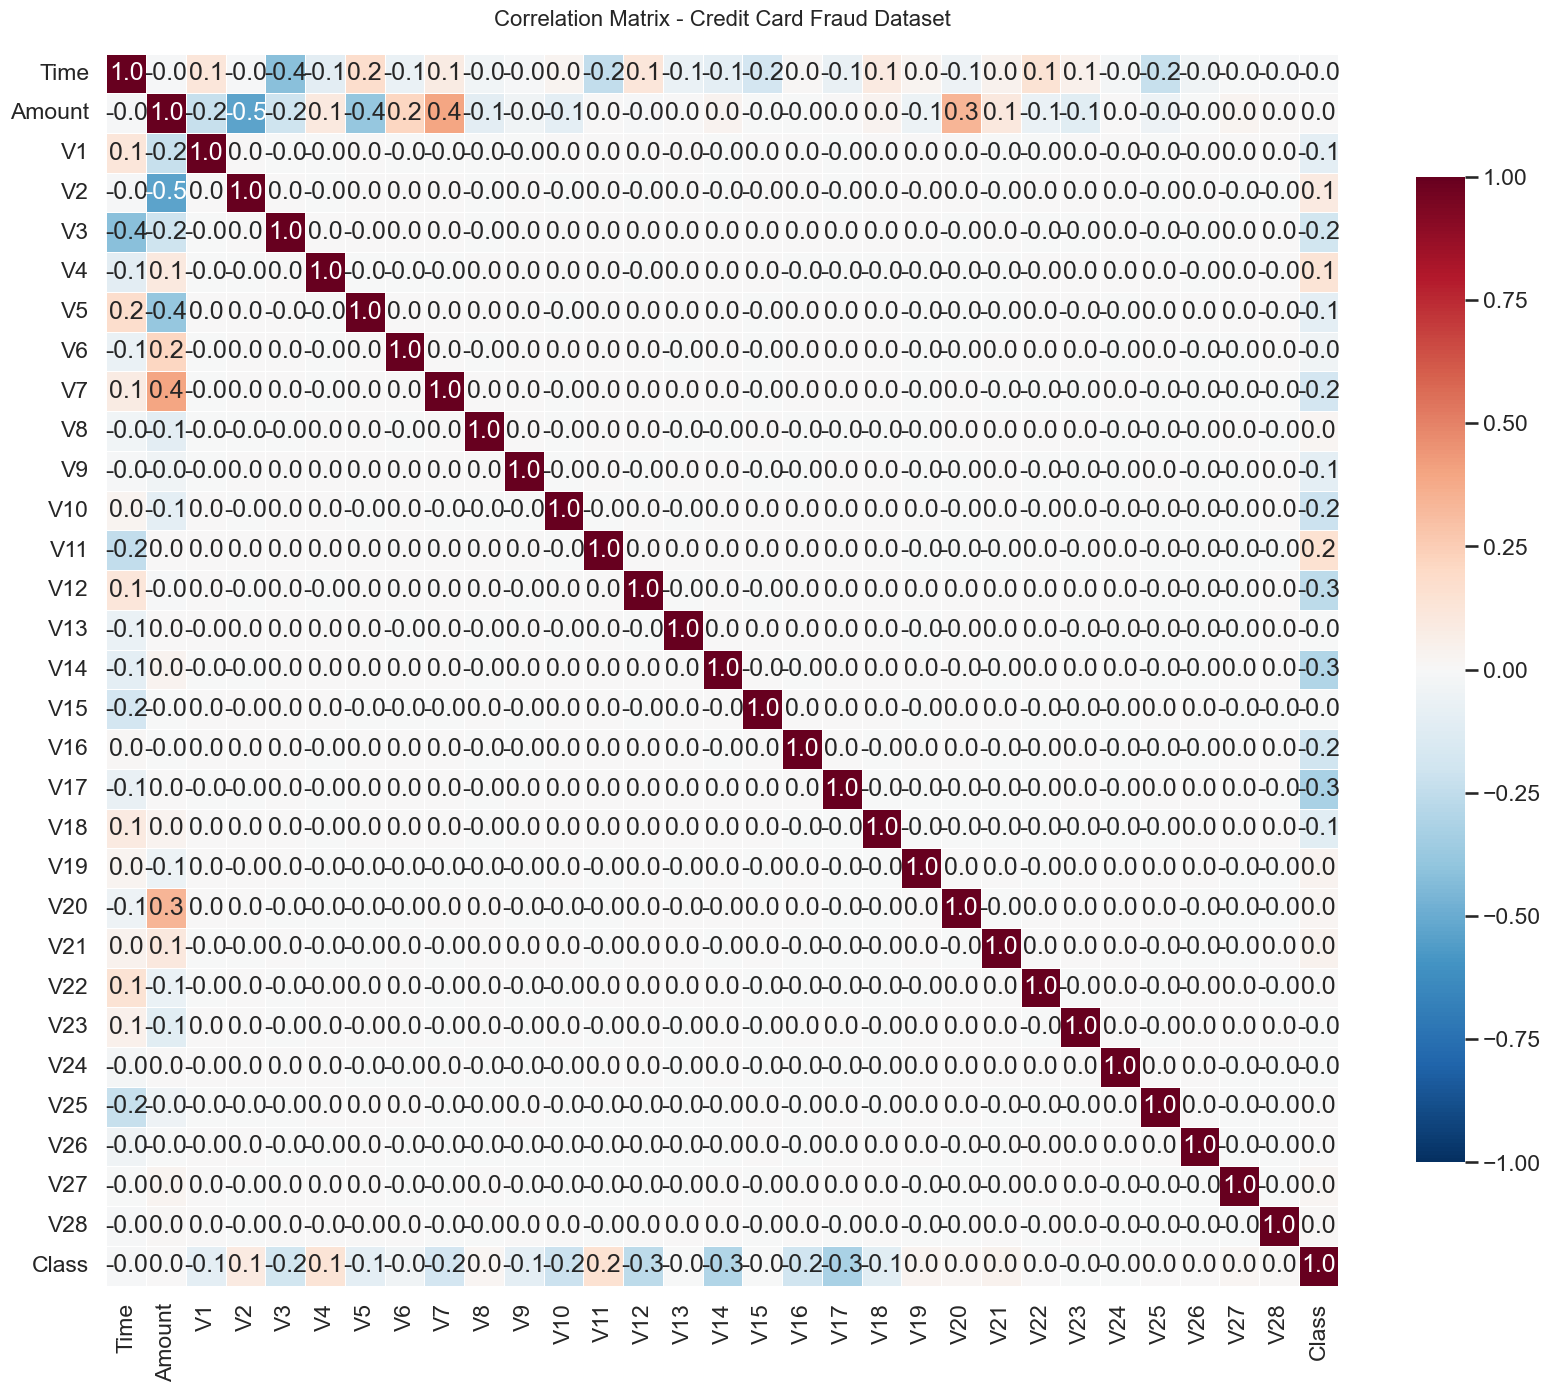

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
Time,1.000000,-0.010596,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.012323
Amount,-0.010596,1.000000,-2.277087e-01,-5.314089e-01,-2.108805e-01,9.873167e-02,-3.863563e-01,2.159812e-01,3.973113e-01,-1.030791e-01,-4.424560e-02,-1.015021e-01,1.039770e-04,-9.541802e-03,5.293409e-03,3.375117e-02,-2.985848e-03,-3.909527e-03,7.309042e-03,3.565034e-02,-5.615079e-02,3.394034e-01,1.059989e-01,-6.480065e-02,-1.126326e-01,5.146217e-03,-4.783686e-02,-3.208037e-03,2.882546e-02,1.025822e-02,0.005632
V1,0.117396,-0.227709,1.000000e+00,4.188326e-16,-1.164018e-15,-9.082889e-16,2.085924e-17,-6.343731e-16,-1.018099e-15,-2.557889e-16,-1.347621e-16,7.340779e-17,2.248163e-16,1.872282e-16,-2.073002e-17,-4.976104e-16,3.407344e-16,7.096369e-17,-3.867239e-16,3.545842e-17,1.480546e-16,4.551909e-16,-2.444306e-16,-4.201199e-16,6.217312e-16,-4.385333e-17,-9.832396e-16,-1.745526e-17,1.196577e-16,2.108702e-15,-0.101347
V2,-0.010593,-0.531409,4.188326e-16,1.000000e+00,3.140164e-16,-1.125909e-15,5.230686e-16,2.781752e-16,1.857398e-16,-5.698764e-17,2.006267e-17,-3.930237e-16,1.965104e-16,-9.856214e-17,6.198203e-16,-1.650479e-16,-3.585606e-17,8.030147e-18,-2.811795e-16,3.316578e-16,-2.891532e-18,2.405781e-16,-8.277282e-17,1.547272e-16,1.668081e-16,1.577058e-17,-4.530958e-16,1.984817e-16,-4.938067e-16,-5.182198e-16,0.091289
V3,-0.419618,-0.210880,-1.164018e-15,3.140164e-16,1.000000e+00,4.644369e-16,-5.483554e-17,1.627805e-15,5.239200e-16,-1.297365e-15,5.725902e-16,1.157736e-15,1.603095e-15,6.467469e-16,2.994011e-16,4.679099e-16,8.922513e-16,8.324900e-16,7.272949e-16,1.516723e-16,3.408492e-16,-9.303429e-16,5.931009e-17,-1.115726e-15,-5.063673e-16,5.605700e-19,-1.118857e-15,-1.389572e-16,1.058098e-15,9.792787e-16,-0.192961
V4,-0.105260,0.098732,-9.082889e-16,-1.125909e-15,4.644369e-16,1.000000e+00,-1.722056e-15,-7.565957e-16,-4.188169e-16,5.645256e-16,6.873528e-16,2.203905e-16,3.498520e-16,-5.618322e-16,1.154166e-16,2.174482e-16,1.538485e-16,-9.619339e-16,-2.708216e-16,-5.023217e-16,-4.042137e-16,-1.808934e-16,-1.862123e-16,-3.949686e-17,9.564529e-17,1.569977e-16,6.026069e-16,-4.237973e-16,4.577343e-17,-3.888959e-18,0.133447
V5,0.173072,-0.386356,2.085924e-17,5.230686e-16,-5.483554e-17,-1.722056e-15,1.000000e+00,2.208263e-16,2.691713e-16,7.396815e-16,7.178142e-16,-5.150417e-16,7.178417e-16,7.494775e-16,5.689265e-16,6.594732e-16,-8.742428e-16,2.218522e-15,1.334374e-16,5.248944e-16,-1.572396e-16,-3.564237e-16,-3.990893e-16,1.277735e-16,-8.760100e-18,-1.142295e-15,5.021165e-16,4.450164e-16,6.538203e-16,-3.301835e-18,-0.094974
V6,-0.063016,0.215981,-6.343731e-16,2.781752e-16,1.627805e-15,-7.565957e-16,2.208263e-16,1.000000e+00,1.213776e-16,-1.030439e-16,4.234240e-16,6.292371e-17,1.975490e-15,2.375485e-16,-1.228256e-16,2.594114e-16,-1.554341e-15,1.520999e-17,2.052321e-16,1.209863e-16,-2.103812e-16,-1.674616e-16,5.551919e-17,5.756004e-18,9.443837e-17,-1.070899e-15,4.568884e-16,-1.402561e-16,-4.500879e-16,2.493919e-16,-0.043643
V7,0.084714,0.397311,-1.018099e-15,1.857398e-16,5.239200e-16,-4.188169e-16,2.691713e-16,1.213776e-16,1.000000e+00,3.549393e-16,1.125386e-15,-6.747856e-17,1.397214e-16,7.917833e-18,7.979500e-18,2.533679e-16,-1.726649e-16,4.920492e-17,2.164087e-16,6.897292e-17,-1.739180e-16,9.225467e-16,-2.122235e-16,-8.840620e-16,-4.458969e-16,9.812896e-18,-2.881866e-16,-9.494990e-16,-1.723845e-15,-2.921030e-16,-0.187257
V8,-0.036949,-0.103079,-2.557889e-16,-5.698764e-17,-1.297365e-15,5.645256e-16,7.396815e-16,-1.030439e-16,3.549393e-16,1.000000e+00,4.340695e-16,-2.687451e-16,2.461364e-16,1.794939e-16,-2.972764e-16

In [21]:
corr = df[['Time','Amount','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Class']].corr(numeric_only=True)
# used AI to format correlation matrix for all columns due to original code not matching size
# sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.figure(figsize=(20, 16))
sns.heatmap(corr, 
            annot=True, 
            fmt='.1f', 
            cmap='RdBu_r',  # Better color scheme for correlations
            vmin=-1, 
            vmax=1,
            center=0,  # Center the colormap at 0
            square=True,  # Make cells square
            cbar_kws={'shrink': 0.8},
            linewidths=0.5,
            linecolor='white')
plt.title('Correlation Matrix - Credit Card Fraud Dataset', fontsize=16, pad=20)
plt.show()
corr

## 6) Insights & Assumptions (write your commentary)

## Insights
 - The PCA anonymized features will be impossible to determine, will have to play around in training to understand them (V1-V28)
- Amount and time are not directly related, this could be due to the fact that multiple accounts are used in this dataset/
- Based on the heatmap, features [V3 V7 V10 V12 V14 V17] are the most inversely correlated with 

## Assumptions/Risks
- Data Quality is very good, PCA has been finished and data is real.
- Outliers are non existent or near zero as all data transformations have occurred and the dataset is real.
- All PCA components carry a risk as they can be related to each other due to similar source columns in calculations, and also the fact that non linear componenets can negtively affect model performance as features should strive to be linear
- No PII is present as columns have been anonymized and are all float64s

## Next steps before modeling
- Data Cleaning will be done using techniques from before (winsorization or iqr), do some research into outliers in real datasets and credit card fraud to determine magnitude
- Using plots like this there will be outliers accounted for based on the information. 

## Features

- Amount/time could also be a feature because it shows spending limits, and extrapolating to a month can see patterns of spending that can be used to identify times when the "budget" is gone over, indicating fraud. However, the data needs to be minimized to person by person, as having multiple people thorughout the data at random intervals will mess up any transaction order. The correlation matrix confirms this issue.
- Time is important because time between transactions can carry key information as to spending habits and irregular transactions. It is currently in seconds, but can be altered to use rolling features like minutes and hours due to the size of the dataset

- Amount is definitely a feature that is importnat as big outliers can be a sign of fraudulent transactions

- Use any of the V features in the training to see how well the model works. Unkown as to what they are due to PCA. However, the correlation matrix's highest magnitude featuers should be of important due to their postive/negative correlations. 